In [1]:
%run prepareStats.py

Last GP in the database: the 2023 Bahrain Grand Prix


In [2]:
pd.set_option('display.max_rows', results.shape[0]+1)

pd.set_option('display.max_columns', results.shape[0]+1)

In [3]:
# results = results[results.year < 2022]

## Individual drivers achieving a win, podium or top 6 finish in a given season

In [4]:
winningDrivers = wins.groupby(["year"]).nunique()["name"].transpose()

<AxesSubplot:xlabel='year'>

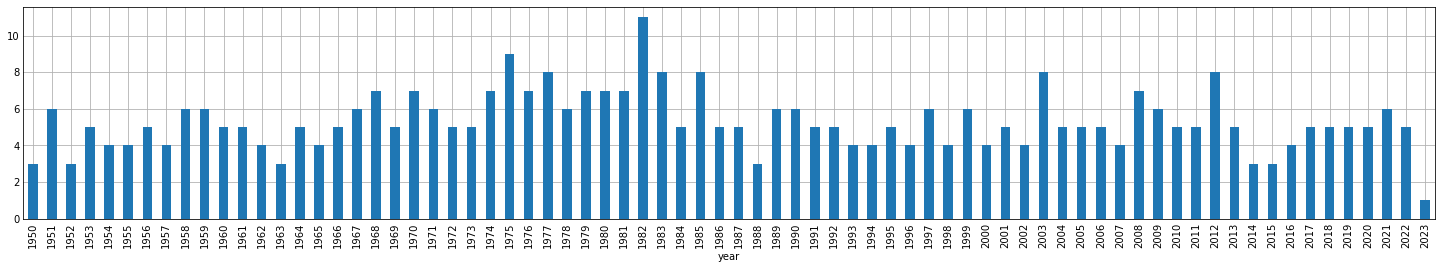

In [5]:
winningDrivers.plot.bar()

In [6]:
podiumDrivers = podiums.groupby(["year"]).nunique()["name"].transpose()

<AxesSubplot:xlabel='year'>

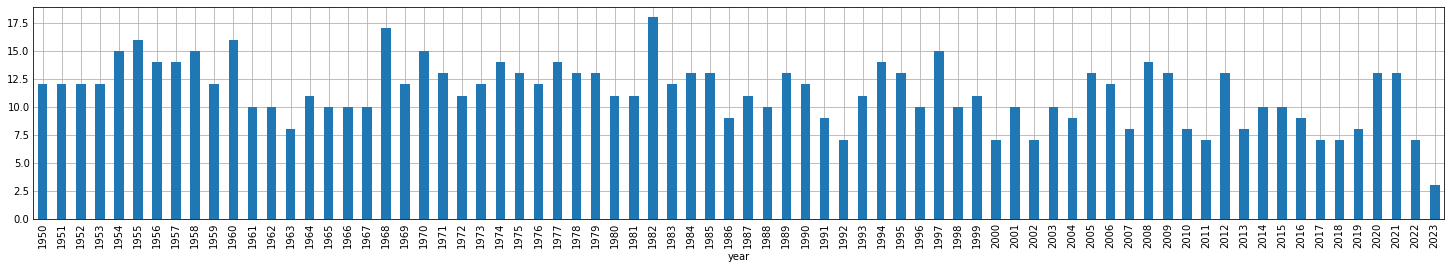

In [7]:
podiumDrivers.plot.bar()

In [8]:
top6drivers = top6.groupby(["year"]).nunique()["name"].transpose()

<AxesSubplot:xlabel='year'>

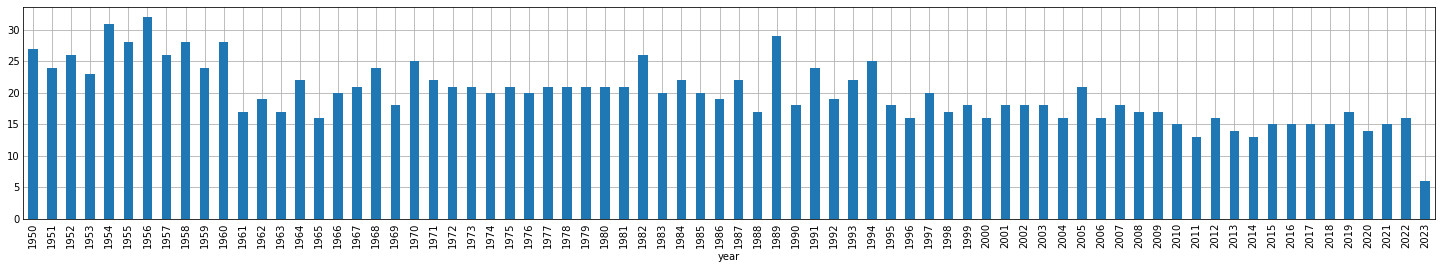

In [9]:
top6drivers.plot.bar()

## Different constructors achieving a win or a podium in a given season

In [10]:
winningConstructors = wins.groupby(["year"]).nunique()["constructor"].transpose()

<AxesSubplot:xlabel='year'>

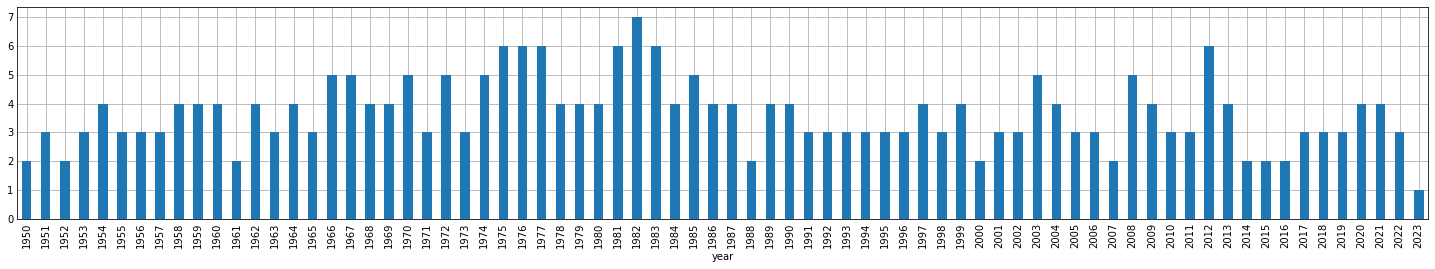

In [11]:
winningConstructors.plot.bar()

In [12]:
podiumConstructors = podiums.groupby(["year"]).nunique()["constructor"].transpose()

<AxesSubplot:xlabel='year'>

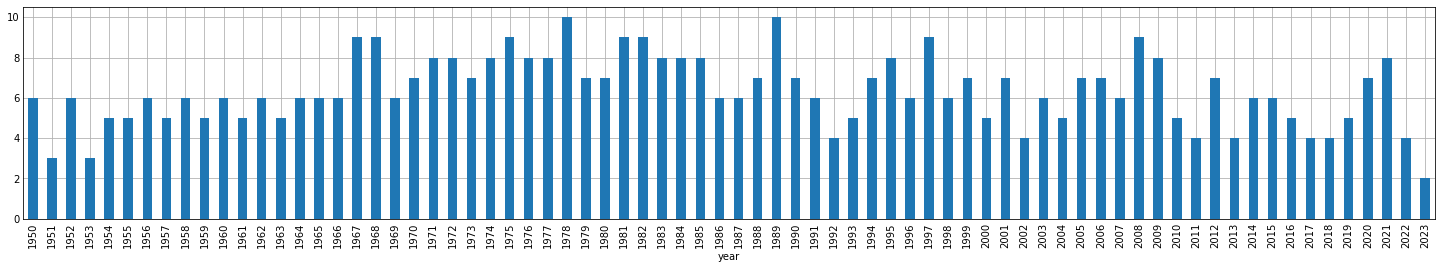

In [13]:
podiumConstructors.plot.bar()

## Drivers' countries and continents of origin

In [14]:
driverNationalities = results.groupby(["year"]).nunique()["nationality"].transpose()

<AxesSubplot:xlabel='year'>

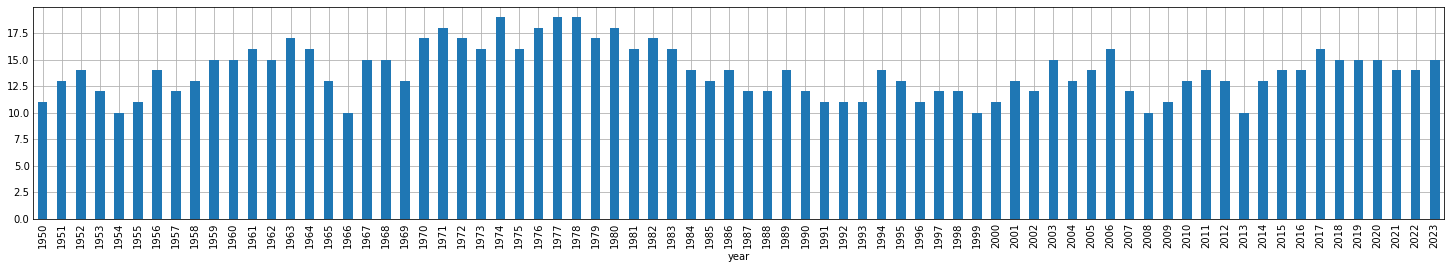

In [15]:
driverNationalities.plot.bar()

In [16]:
winNationality = wins.groupby(["year"]).nunique()["nationality"].transpose()

<AxesSubplot:xlabel='year'>

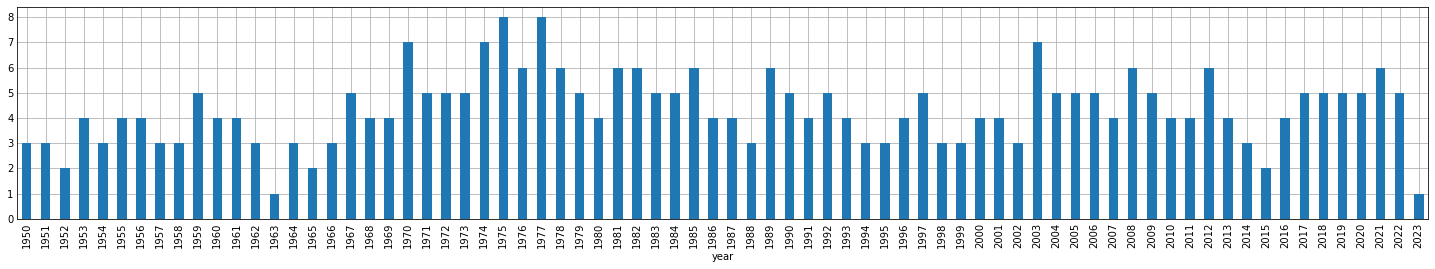

In [17]:
winNationality.plot.bar()

In [18]:
driverContinents = results.groupby(["year"]).nunique()["driverContinent"].transpose()

<AxesSubplot:xlabel='year'>

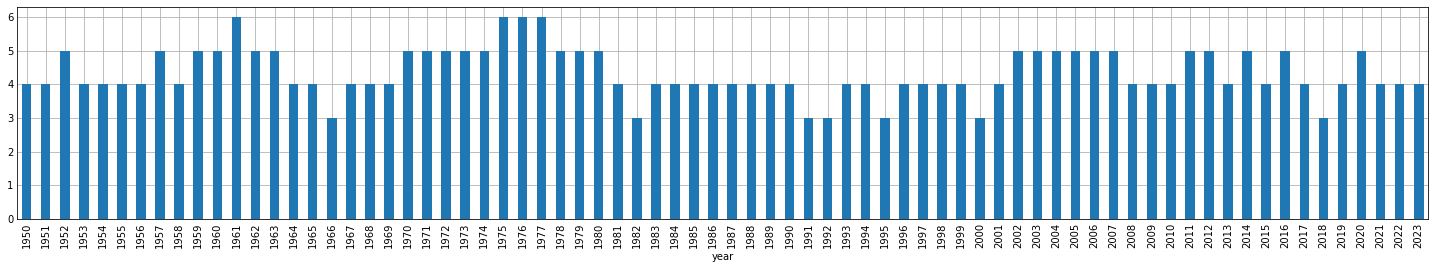

In [19]:
driverContinents.plot.bar()

In [20]:
driverPodiumContinents = podiums.groupby(["year"]).nunique()["driverContinent"].transpose()

<AxesSubplot:xlabel='year'>

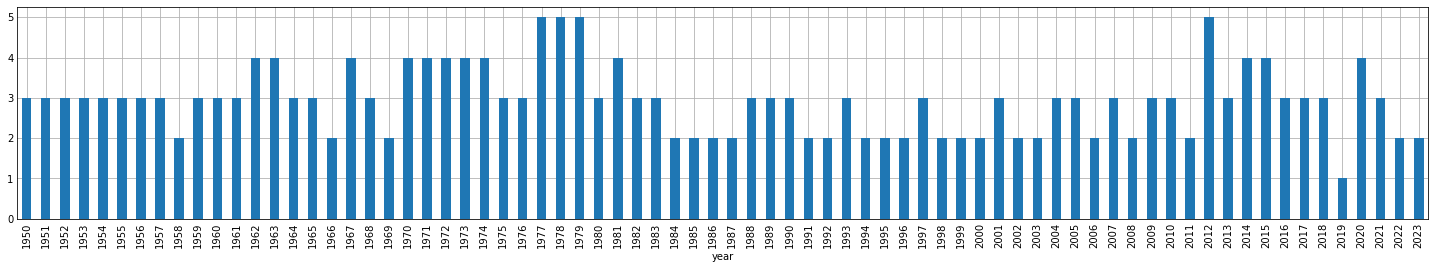

In [21]:
driverPodiumContinents.plot.bar()

2019 Formula One World Championship? More like 2019 Formula One European Championship!

In [22]:
driverWinsContinents = wins.groupby(["year"]).nunique()["driverContinent"].transpose()

<AxesSubplot:xlabel='year'>

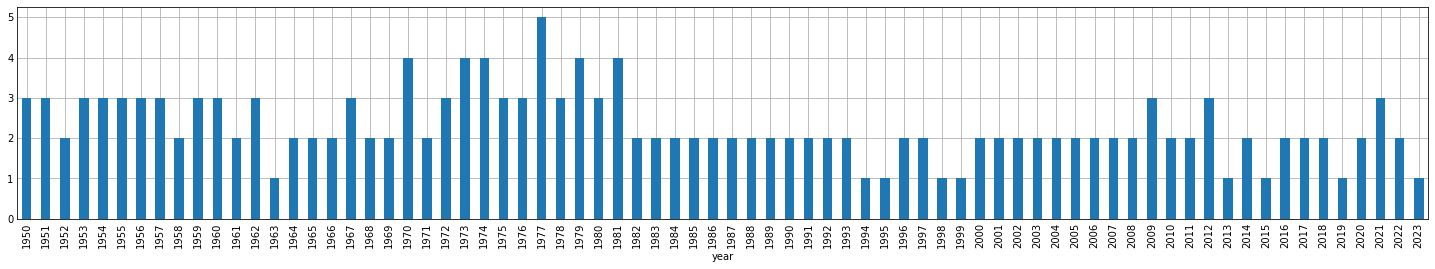

In [23]:
driverWinsContinents.plot.bar()

However, 2019 wasn't the first season with only European drivers winning.

In [24]:
europeanWinsRatio = wins[wins["driverContinent"] == "Europe"].groupby(["year"]).nunique()["raceId"].transpose() / wins.groupby(["year"]).nunique()["raceId"].transpose()

<AxesSubplot:xlabel='year'>

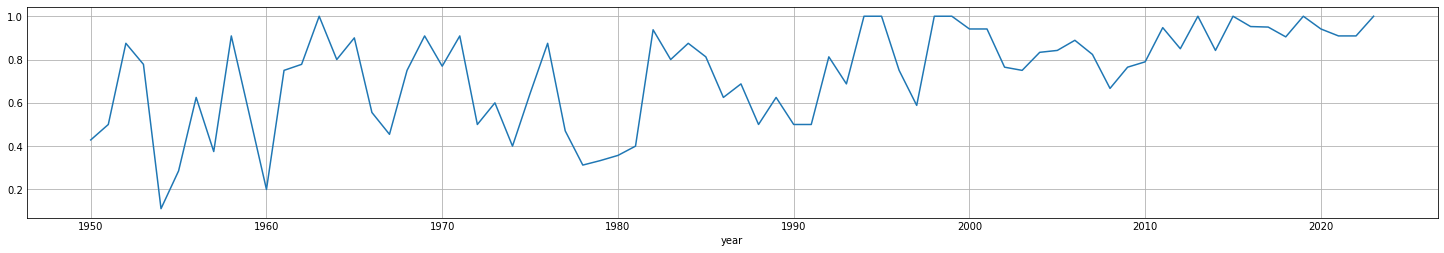

In [25]:
europeanWinsRatio.plot()

In [26]:
europeanPodiumRatio = podiums[podiums["driverContinent"] == "Europe"].groupby(["year"])["raceId"].count() / podiums.groupby(["year"])["raceId"].count()

<AxesSubplot:xlabel='year'>

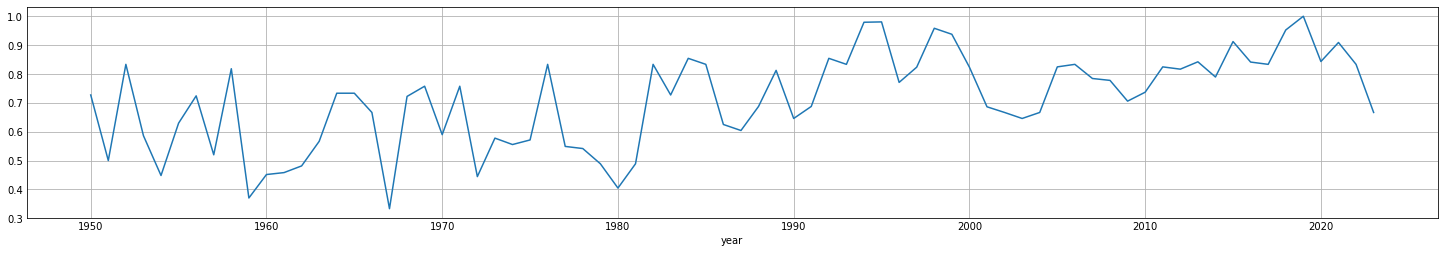

In [27]:
europeanPodiumRatio.plot()

In [28]:
results[~results.status.isin(dnqs)].groupby(["year", "location", "round"])["nationality"].nunique().nlargest(10)

year  location        round
1974  Anderstorp      7        16
1978  Kent            10       16
      New York State  15       16
      Spielberg       12       16
1979  Dijon           8        16
      Hockenheim      10       16
      Montreal        14       16
      Silverstone     9        16
      Spielberg       11       16
      Zandvoort       12       16
Name: nationality, dtype: int64

In [29]:
results[(~results.status.isin(dnqs))].groupby(["nationality", "location", "year", "round"])["nationality"].count().nlargest(100)

nationality  location              year  round
American     Indianapolis          1954  2        55
                                   1953  2        47
                                   1950  3        35
                                   1955  3        35
                                   1951  2        34
                                   1956  3        34
                                   1957  3        33
                                   1958  4        33
                                   1959  2        33
                                   1960  3        33
                                   1952  2        32
British      Silverstone           1952  5        18
                                   1954  5        18
             Liverpool             1961  5        16
                                   1959  5        15
                                   1957  5        14
             Silverstone           1953  6        14
                                   1956  6        14

## European Championship

Counting only points achieved by European drivers on European circuits (including Istanbul, Baku and Sochi).

Michael Schumacher would have won the 1997 EC, but we're going to DSQ him for hitting Jacques Villeneuve in Jerez, just like in the real 1997 WC.

See also: [European Championship](https://f1.fandom.com/wiki/European_Championship)

> The European Championship existed as a predecessor to the Formula One World Championship and was held between 1931 and 1939. The first champion was Ferdinando Minoia, with Rudolf Caracciola winning three titles. The championship was discontinued because of the outbreak of World War II in 1939, and no champion was officially declared for the last season. From 1936, the German drivers, including Caracciola, drove under the Nazi flag.

In [30]:
ec = results[~(results.name.eq("Michael Schumacher") & results.year.eq(1997))]
ec = ec[ec.nationality.isin(Europe) & ec.country.isin(Europe)]

In [31]:
ec.groupby(["year", "name"]).agg({"points": sum}).groupby("year")["points"].nlargest(3)

year  year  name                 
1950  1950  Nino Farina               30.00
            Luigi Fagioli             28.00
            Louis Rosier              13.00
1951  1951  Alberto Ascari            28.00
            Nino Farina               22.00
            Luigi Villoresi           18.00
1952  1952  Alberto Ascari            53.50
            Nino Farina               27.00
            Piero Taruffi             22.00
1953  1953  Alberto Ascari            37.50
            Nino Farina               32.00
            Mike Hawthorn             24.00
1954  1954  Mike Hawthorn             24.64
            Maurice Trintignant       14.00
            Karl Kling                12.00
1955  1955  Stirling Moss             22.00
            Eugenio Castellotti       12.00
            Piero Taruffi              9.00
1956  1956  Stirling Moss             28.00
            Peter Collins             25.00
            Jean Behra                16.00
1957  1957  Stirling Moss             24.0

In [32]:
ec.groupby(["year", "name"]).agg({"points": sum}).groupby("year")["points"].nlargest(1).groupby("name").count().nlargest(50)

name
Lewis Hamilton           8
Alain Prost              7
Michael Schumacher       7
Stirling Moss            4
Nigel Mansell            4
Niki Lauda               3
Jim Clark                3
Alberto Ascari           3
Sebastian Vettel         3
Jackie Stewart           3
Fernando Alonso          3
Mika Häkkinen            2
Graham Hill              2
Mike Hawthorn            2
Jochen Rindt             2
Clay Regazzoni           2
Max Verstappen           2
Jacky Ickx               2
Nino Farina              1
Ronnie Peterson          1
Jenson Button            1
James Hunt               1
Jacques Laffite          1
Innes Ireland            1
Heinz-Harald Frentzen    1
Didier Pironi            1
David Coulthard          1
Damon Hill               1
Wolfgang von Trips       1
Name: points, dtype: int64

In fact, Stirling Moss would have been a 5-time European F1 Champion, as he achieved better results than Innes Ireland in 1960.

## Drivers' age

In [33]:
results["ageyears"] = results["age"] / np.timedelta64(1, 'Y')

In [34]:
meanAgeSeason = results.groupby("year")["ageyears"].mean()
maxAgeSeason = results.groupby("year")["ageyears"].max()
minAgeSeason = results.groupby("year")["ageyears"].min()

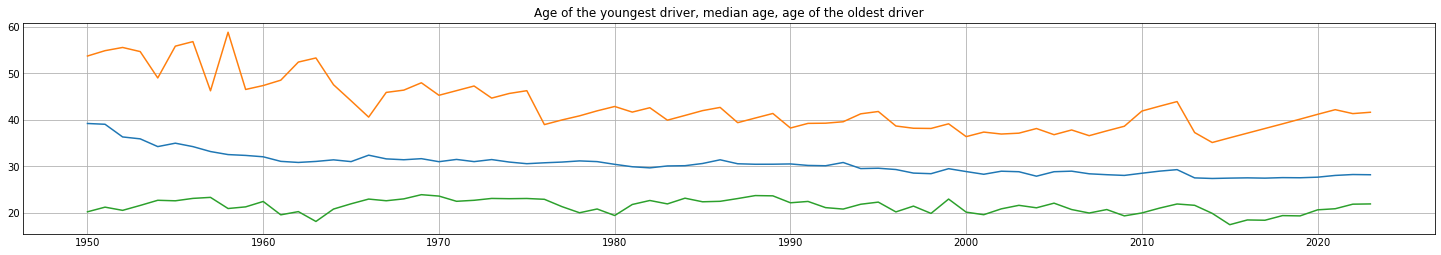

In [35]:
fig, ax = plt.subplots()
ax.plot(meanAgeSeason)
ax.plot(maxAgeSeason)
ax.plot(minAgeSeason)
plt.title("Age of the youngest driver, median age, age of the oldest driver")
plt.show()

## How diverse has the F1 calendar been?

In [36]:
results.loc[results.country.isin(Europe),"locationContinent"]="Europe"
results.loc[results.country.isin(NAmerica),"locationContinent"]="NAmerica"
results.loc[results.country.isin(SAmerica),"locationContinent"]="SAmerica"
results.loc[results.country.isin(Asia),"locationContinent"]="Asia"
results.loc[results.country.isin(Africa),"locationContinent"]="Africa"
results.loc[results.country.isin(Oceania),"locationContinent"]="Oceania"

<AxesSubplot:xlabel='year'>

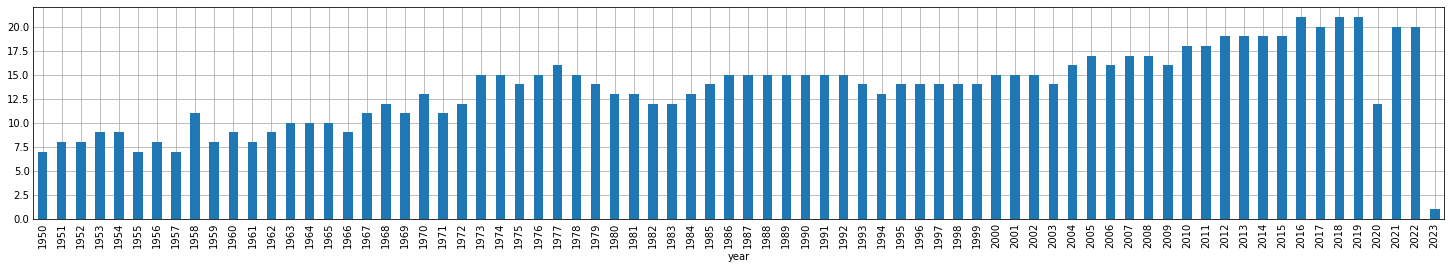

In [37]:
results.groupby("year")["country"].nunique().plot.bar()

<AxesSubplot:xlabel='year'>

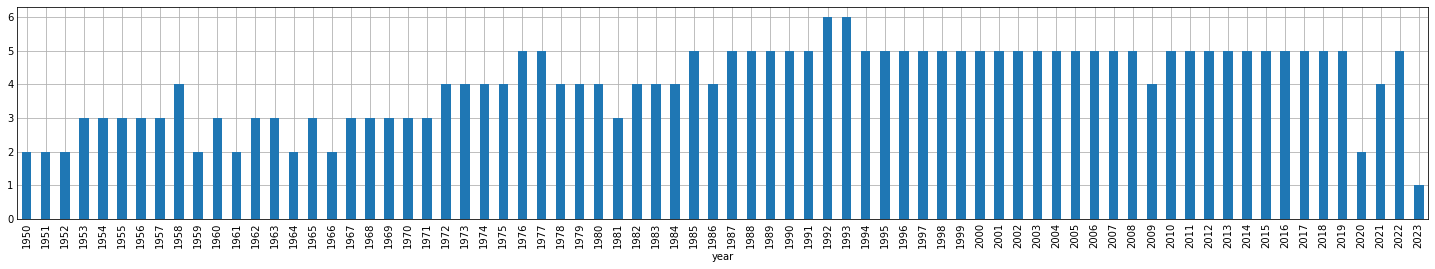

In [38]:
results.groupby("year")["locationContinent"].nunique().plot.bar()

<AxesSubplot:xlabel='year'>

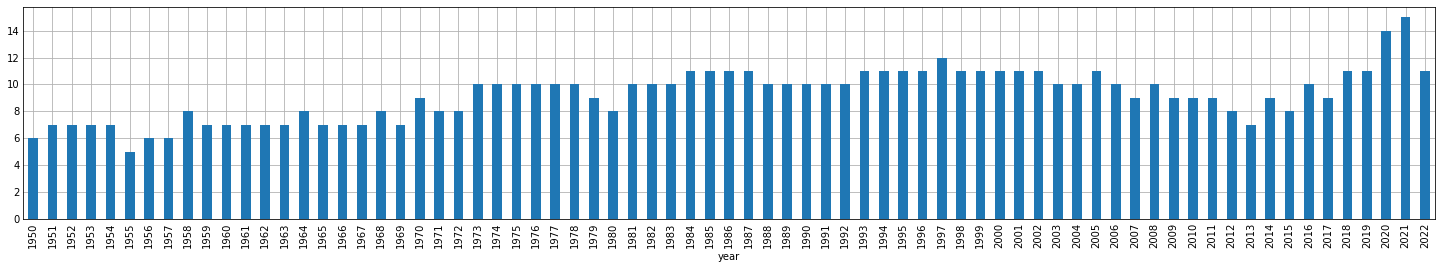

In [39]:
results[results["locationContinent"] == "Europe"].groupby("year")["round"].nunique().plot.bar()

In [40]:
europeanRacesRatio = pd.Series(results[results["locationContinent"] == "Europe"].groupby("year")["round"].nunique() / results.groupby("year")["round"].nunique())
NAmericanRacesRatio = pd.Series(results[results["locationContinent"] == "NAmerica"].groupby("year")["round"].nunique() / results.groupby("year")["round"].nunique())
SAmericanRacesRatio = pd.Series(results[results["locationContinent"] == "SAmerica"].groupby("year")["round"].nunique() / results.groupby("year")["round"].nunique())
asianRacesRatio = pd.Series(results[results["locationContinent"] == "Asia"].groupby("year")["round"].nunique() / results.groupby("year")["round"].nunique())
africanRacesRatio = pd.Series(results[results["locationContinent"] == "Africa"].groupby("year")["round"].nunique() / results.groupby("year")["round"].nunique())
oceanianRacesRatio = pd.Series(results[results["locationContinent"] == "Oceania"].groupby("year")["round"].nunique() / results.groupby("year")["round"].nunique())

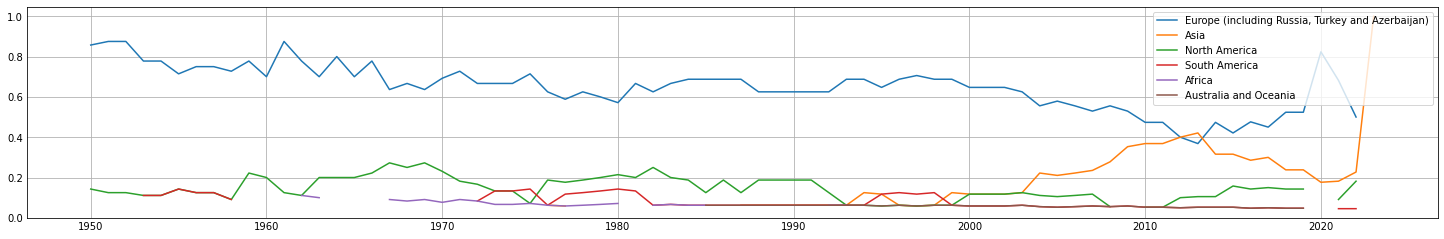

In [41]:
plt.plot(europeanRacesRatio, label="Europe (including Russia, Turkey and Azerbaijan)")
plt.plot(asianRacesRatio, label="Asia")
plt.plot(NAmericanRacesRatio, label="North America")
plt.plot(SAmericanRacesRatio, label="South America")
plt.plot(africanRacesRatio, label="Africa")
plt.plot(oceanianRacesRatio, label="Australia and Oceania")
plt.legend()
plt.show()

In [42]:
westernEurope = ["Austria", "Belgium", "Germany", "France", "Italy", "Monaco", "Netherlands", "Portugal", "Spain", "Sweden", "Switzerland", "UK"]
results["westernEurope"] = False
results.loc[results.country.isin(westernEurope),"westernEurope"] = True

<AxesSubplot:xlabel='year'>

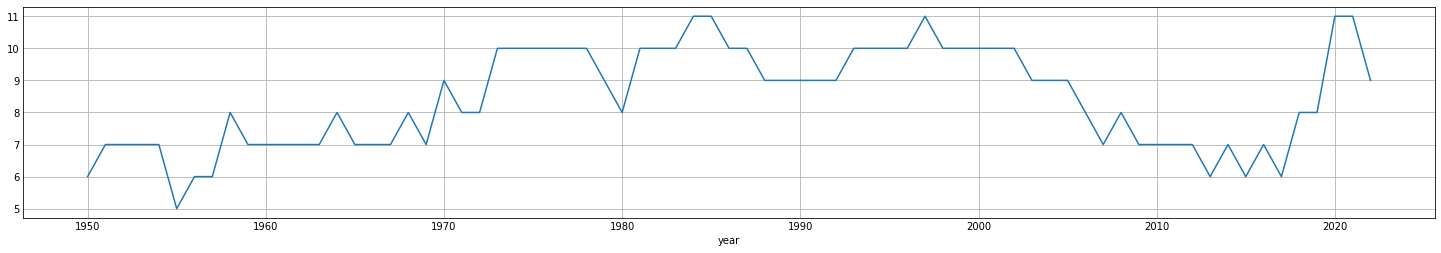

In [43]:
results[results["westernEurope"] == True].groupby("year")["round"].nunique().plot()